In [ ]:
import pandas  as pd
import geopandas as gpd
import sys
import numpy as np
from joblib import Parallel, delayed
import itertools
import matplotlib.pyplot as plt
import time
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
covid = pd.read_csv('./datos/Casos_Diarios_Municipio_Confirmados_20211031.csv')
covid.head()

,cve_ent,poblacion,nombre,26-02-2020,27-02-2020,28-02-2020,29-02-2020,01-03-2020,02-03-2020,03-03-2020,...,22-10-2021,23-10-2021,24-10-2021,25-10-2021,26-10-2021,27-10-2021,28-10-2021,29-10-2021,30-10-2021,31-10-2021
0,16046,15290,Juarez,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16047,22358,Jungapeo,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16048,5862,Lagunillas,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,16049,18769,Madero,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5035,744247,Torreon,0,0,1,0,0,0,0,...,24,20,7,35,21,28,21,10,2,0


In [6]:
municipios = gpd.read_file('./datos/municipios/muni_2018gw.shp')
municipios.head()

,CVE_ENT,CVE_MUN,CVEGEO,NOM_ENT,AREA,PERIMETER,NOM_MUN,COV_,COV_ID,geometry
0,01,001,01001,Aguascalientes,116635.92455,1166.35925,Aguascalientes,0,1,"POLYGON ((-102.09775 22.02325, -102.09857 22.0..."
1,01,002,01002,Aguascalientes,54337.42654,543.37427,Asientos,1,2,"POLYGON ((-101.99941 22.21951, -101.99940 22.2..."
2,01,003,01003,Aguascalientes,92335.78320,923.35783,Calvillo,2,3,"POLYGON ((-102.57625 21.96778, -102.57626 21.9..."
3,01,004,01004,Aguascalientes,12838.35453,128.38355,CosÃ­o,3,4,"POLYGON ((-102.25320 22.37449, -102.25239 22.3..."
4,01,005,01005,Aguascalientes,49989.50926,499.89509,JesÃºs MarÃ­a,4,5,"POLYGON ((-102.31034 22.03716, -102.30653 22.0..."


<AxesSubplot:>

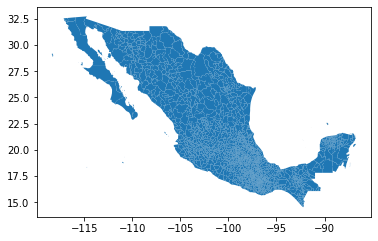

In [5]:
municipios.plot()

In [11]:
municipios['CVE_MUN'] = municipios['CVE_MUN'].astype(str).astype(int)
municipios['CVE_ENT'] = municipios['CVE_ENT'].astype(str).astype(int)
municipios['CVEGEO'] = municipios['CVEGEO'].astype(str).astype(int)
municipios.dtypes

CVE_ENT         int64
CVE_MUN         int64
CVEGEO          int64
NOM_ENT        object
AREA          float64
PERIMETER     float64
NOM_MUN        object
COV_            int64
COV_ID          int64
geometry     geometry
dtype: object